In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF

import plot_params
plt.rcParams.update(plot_params.fig_opt_bounds_ex) 

from models import Optimal_Bounds, Noisy_Bounds, Interpolant

16.41741231863641


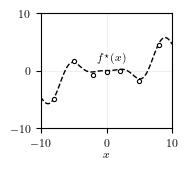

In [2]:
np.random.seed(1) 
k = RBF(length_scale=2.5)

xmin, xmax = -10., 10
xx = np.linspace(xmin, xmax, 100).reshape(-1, 1) 

n_centers = 15
centers = np.linspace(xmin*0.6, xmax*0.6, n_centers).reshape(-1, 1)
values = 0.06*(np.square(centers) * np.sin(centers))

s = Interpolant(k, centers, values, jitter=1e-10)
gamma = s.norm()

X = np.array([-8, -5, -2, 0, 2, 5, 8]).reshape(-1,1)
fX = s(X)

delta_bar = 0.5
delta = np.random.uniform(-delta_bar, delta_bar, fX.shape)
Y = fX + delta

#X = np.linspace(xmin*.8, xmax*.8, 4).reshape(-1, 1) 
#X = np.linspace(xmin*.8, xmax*.8, 4).reshape(-1, 1) 
#X = np.random.uniform(xmin, xmax, 10).reshape(-1, 1)
#Y = np.sin(X).reshape(-1, 1) 
#Y = (np.sin(10*X) + 0.2*X).reshape(-1, 1) 

fig = plt.figure()
plt.xlabel('$x$')
#plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.18, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
#plt.title("".join(['$\Vert f \Vert_\mathcal{H} = \;$', str(round(s.norm(),2))]))
plt.plot(xx, s(xx), "k--")
plt.plot(X, Y, "o")
plt.text(-1.5, 1.8,"$f^\star(x)$")#, fontsize=7)

filename = 'chap2_ex_opt_bounds_gt_samples'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)

print(s.norm())

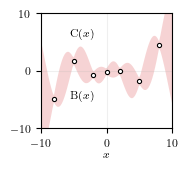

In [3]:
bounds = Optimal_Bounds(X, Y, k, gamma*1.1, delta_bar)
ub = bounds(xx, "upper")
lb = bounds(xx, "lower")

fig = plt.figure()
plt.xlabel('$x$')
#plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.18, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), facecolor=plot_params.colors["red"], alpha=0.2)
plt.plot(X, Y, 'o')

plt.text(-5.5, 6, "C$(x)$")
plt.text(-5.5, -4.7, "B$(x)$")

filename = 'chap2_ex_opt_bounds_bound_samples'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)

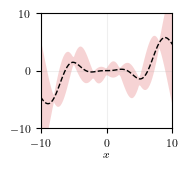

In [4]:
fig = plt.figure()
plt.xlabel('$x$')
#plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.18, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), facecolor=plot_params.colors["red"], alpha=0.2)
plt.plot(xx, s(xx), "k--")

filename = 'chap2_ex_opt_bounds_bound_gt'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)

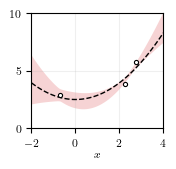

In [12]:
np.random.seed(1) 
k = RBF(length_scale=6.)

xmin, xmax = -2., 4.
xx = np.linspace(xmin, xmax, 100).reshape(-1, 1) 
yy = ((xx*0.6)**2 + 2.5).reshape(-1,1)

X = np.array([-0.7, 2.25, 2.75]).reshape(-1,1)
fX = ((X*0.6)**2 + 2.5).reshape(-1,1)
delta_bar = 0.5
delta = np.array([0.2, -delta_bar, delta_bar]).reshape(-1,1)
Y = fX + delta

bounds = Optimal_Bounds(X, Y, k, gamma=35, delta_bar=delta_bar)
ub = bounds(xx, "upper")
lb = bounds(xx, "lower")

fig = plt.figure()
plt.xlabel('$x$')
#plt.ylabel('$f(x)$')
fig.axes[0].yaxis.set_label_coords(-0.18, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
#plt.xticks([-10, 0, 10])
#plt.xlim(-10,10)
plt.yticks([0, 5, 10])
plt.ylim(0,10)
#plt.title("".join(['$\Vert f \Vert_\mathcal{H} = \;$', str(round(s.norm(),2))]))
plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), facecolor=plot_params.colors["red"], alpha=0.2)
plt.plot(xx, yy, "k--")
plt.plot(X, Y, "o")

filename = 'chap2_ex_opt_bounds_samp_loc'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)

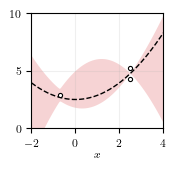

In [202]:
np.random.seed(1) 
k = RBF(length_scale=6.)

xmin, xmax = -2., 4.
xx = np.linspace(xmin, xmax, 200).reshape(-1, 1) 
yy = ((xx*0.6)**2 + 2.5).reshape(-1,1)

X = np.array([-0.7, 2.5, 2.5]).reshape(-1,1)
fX = ((X*0.6)**2 + 2.5).reshape(-1,1)
delta_bar = 0.5
delta = np.array([0.2, -delta_bar, delta_bar]).reshape(-1,1)
Y = fX + delta

bounds = Optimal_Bounds(X, Y, k, gamma=35, delta_bar=delta_bar)
ub = bounds(xx, "upper")
lb = bounds(xx, "lower")

fig = plt.figure()
plt.xlabel('$x$')
fig.axes[0].yaxis.set_label_coords(-0.18, .5)
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.yticks([0, 5, 10])
plt.ylim(0,10)
plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), facecolor=plot_params.colors["red"], alpha=0.2)
plt.plot(xx, yy, "k--")
plt.plot(X, Y, "o")

#plt.text(0.53,6.7,"C$(x)$")
#plt.text(0.53,0.7,"B$(x)$")

filename = 'chap2_ex_opt_bounds_samp_loc2'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)

# Example 3

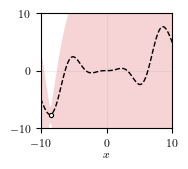

In [235]:
np.random.seed(1) 
k = RBF(length_scale=2)

xmin, xmax = -10., 10
xx = np.linspace(xmin, xmax, 100).reshape(-1, 1) 

n_centers = 15
centers = np.linspace(xmin*0.6, xmax*0.6, n_centers).reshape(-1, 1)
values = 0.1*(np.square(centers) * np.sin(centers))
s = Interpolant(k, centers, values, jitter=1e-10)
gamma = s.norm()

#X = np.array([-8, -5, -2, 0, 2, 5, 8]).reshape(-1,1)
X = np.array([-8.5]).reshape(-1,1)
fX = s(X)

delta_bar = 0.8
delta = np.random.uniform(-delta_bar, delta_bar, fX.shape)
Y = fX + delta

bounds = Optimal_Bounds(X, Y, k, gamma, delta_bar)
ub = bounds(xx, "upper")
lb = bounds(xx, "lower")

fig = plt.figure()
plt.xlabel('$x$')
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.plot(xx, s(xx), "k--")
plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), facecolor=plot_params.colors["red"], alpha=0.2)
plt.plot(X, Y, "o")

filename = 'chap2_ex3_opt_bounds_A'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)

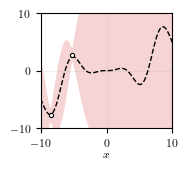

In [236]:
X = np.vstack((X, np.array([[-5.2]])))
fX = s(X)
np.random.seed(1) 
delta = np.random.uniform(-delta_bar, delta_bar, fX.shape)
Y = fX + delta

bounds = Optimal_Bounds(X, Y, k, gamma, delta_bar)
ub = bounds(xx, "upper")
lb = bounds(xx, "lower")

fig = plt.figure()
plt.xlabel('$x$')
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.plot(xx, s(xx), "k--")
plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), facecolor=plot_params.colors["red"], alpha=0.2)
plt.plot(X, Y, "o")

filename = 'chap2_ex3_opt_bounds_B'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)


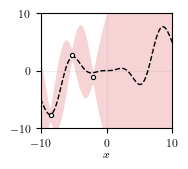

In [237]:
X = np.vstack((X, np.array([[-2]])))
fX = s(X)
np.random.seed(1) 
delta = np.random.uniform(-delta_bar, delta_bar, fX.shape)
Y = fX + delta

bounds = Optimal_Bounds(X, Y, k, gamma, delta_bar)
ub = bounds(xx, "upper")
lb = bounds(xx, "lower")

fig = plt.figure()
plt.xlabel('$x$')
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.plot(xx, s(xx), "k--")
plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), facecolor=plot_params.colors["red"], alpha=0.2)
plt.plot(X, Y, "o")

filename = 'chap2_ex3_opt_bounds_C'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)


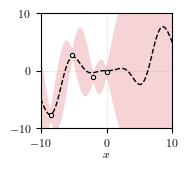

In [238]:
X = np.vstack((X, np.array([[0]])))
fX = s(X)
np.random.seed(1) 
delta = np.random.uniform(-delta_bar, delta_bar, fX.shape)
Y = fX + delta

bounds = Optimal_Bounds(X, Y, k, gamma, delta_bar)
ub = bounds(xx, "upper")
lb = bounds(xx, "lower")

fig = plt.figure()
plt.xlabel('$x$')
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.plot(xx, s(xx), "k--")
plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), facecolor=plot_params.colors["red"], alpha=0.2)
plt.plot(X, Y, "o")

filename = 'chap2_ex3_opt_bounds_D'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)


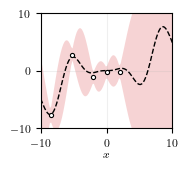

In [239]:
X = np.vstack((X, np.array([[2]])))
fX = s(X)
np.random.seed(1) 
delta = np.random.uniform(-delta_bar, delta_bar, fX.shape)
Y = fX + delta

bounds = Optimal_Bounds(X, Y, k, gamma, delta_bar)
ub = bounds(xx, "upper")
lb = bounds(xx, "lower")

fig = plt.figure()
plt.xlabel('$x$')
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.plot(xx, s(xx), "k--")
plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), facecolor=plot_params.colors["red"], alpha=0.2)
plt.plot(X, Y, "o")

filename = 'chap2_ex3_opt_bounds_E'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)


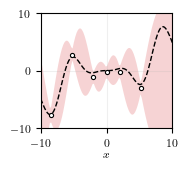

In [240]:
X = np.vstack((X, np.array([[5.2]])))
fX = s(X)
np.random.seed(1) 
delta = np.random.uniform(-delta_bar, delta_bar, fX.shape)
Y = fX + delta

bounds = Optimal_Bounds(X, Y, k, gamma, delta_bar)
ub = bounds(xx, "upper")
lb = bounds(xx, "lower")

fig = plt.figure()
plt.xlabel('$x$')
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.plot(xx, s(xx), "k--")
plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), facecolor=plot_params.colors["red"], alpha=0.2)
plt.plot(X, Y, "o")

filename = 'chap2_ex3_opt_bounds_F'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)


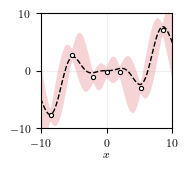

In [241]:
X = np.vstack((X, np.array([[8.5]])))
fX = s(X)
np.random.seed(1) 
delta = np.random.uniform(-delta_bar, delta_bar, fX.shape)
Y = fX + delta

bounds = Optimal_Bounds(X, Y, k, gamma, delta_bar)
ub = bounds(xx, "upper")
lb = bounds(xx, "lower")

fig = plt.figure()
plt.xlabel('$x$')
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.plot(xx, s(xx), "k--")
plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), facecolor=plot_params.colors["red"], alpha=0.2)
plt.plot(X, Y, "o")

filename = 'chap2_ex3_opt_bounds_G'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)


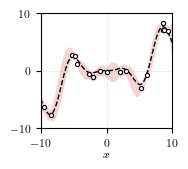

In [242]:
np.random.seed(12) 
Z = np.vstack((X, np.random.uniform(-5.,xmax,(9,1))))
Z = np.vstack((Z, np.array([[-9.5]])))
fX = s(Z)
np.random.seed(1) 
delta = np.random.uniform(-delta_bar, delta_bar, fX.shape)
Y = fX + delta

bounds = Optimal_Bounds(Z, Y, k, gamma, delta_bar)
ub = bounds(xx, "upper")
lb = bounds(xx, "lower")

fig = plt.figure()
plt.xlabel('$x$')
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.plot(xx, s(xx), "k--")
plt.fill_between(xx.reshape(-1,), ub.reshape(-1,), lb.reshape(-1,), facecolor=plot_params.colors["red"], alpha=0.2)
plt.plot(Z, Y, "o")

filename = 'chap2_ex3_opt_bounds_H'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)


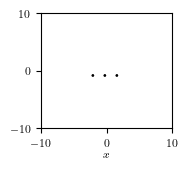

In [243]:

fig = plt.figure()
plt.xlabel('$x$')
plt.xticks([-10, 0, 10])
plt.yticks([-10, 0, 10])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid(0)
fig.axes[0].xaxis.set_label_coords(0.5, -0.18)
plt.text(-2.3, -1.2,"$\cdots$", fontsize=20)

filename = 'chap2_ex3_dots'
plt.savefig("".join([plot_params.path_to_img_folder, filename, ".pdf"]), bbox_inches='tight', pad_inches = 0.)
